In [0]:
import numpy as np #A mathematics tool we can use to deal with arrays
import torch #PyTorch is the machine learning library we will use
import torchvision #Gives us access to the dataset we need
import matplotlib.pyplot as plt #Plotting tool
from time import time
from torchvision import datasets, transforms
from torch import nn, optim #Neural Network optimization tool

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,))])
training_set = datasets.MNIST('-/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(training_set, batch_size=64, shuffle=True)
dataiter = iter(trainloader)
images, labels = dataiter.next()

0it [00:00, ?it/s]

9920512it [00:01, 9399111.98it/s]                            


Extracting -/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 143484.53it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting -/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2423341.99it/s]                           
0it [00:00, ?it/s]

Extracting -/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 52360.65it/s]            


Extracting -/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


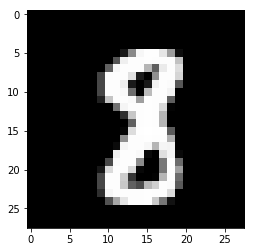

In [4]:
plt.imshow(images[1].numpy().squeeze(), cmap= "Greys_r")

In [0]:
#784 inputs, 128  hiddenl (ReLU), 64 hidden2 (ReLU), 10 output (Softmax)
from torch import nn
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

#Build a Feed-forward network
model= nn.Sequential(nn.Linear(input_size, hidden_sizes[0]), nn.ReLU(), nn.Linear(hidden_sizes[0], hidden_sizes[1]), 
                     nn.Linear(hidden_sizes[1], output_size), nn.Softmax(dim=1))
dataiter = iter(trainloader)
images, labels = dataiter.next()
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0, :])

In [8]:
#define loss function
criterion = nn.NLLLoss()
#iterate over the data
dataiter = iter(trainloader)
images, labels = dataiter.next()
#reshape data
images = images.view(images.shape[0], -1)
#Feed forward
logps = model(images)
loss = criterion(logps, labels)
print(loss)

tensor(-0.0979, grad_fn=<NllLossBackward>)


In [20]:
optimizer = optim.SGD(model.parameters(), lr=0.001)
epochs = 4
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        #Backpropagation
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(e, running_loss/len(trainloader))

0 -0.9098364996757589
1 -0.9100604437307508
2 -0.9101923854112117
3 -0.9103974499809209


In [21]:
correct = 0
all_counted = 0
for images,labels in trainloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probability = list(ps.numpy()[0])
    pred_label = probability.index(max(probability))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct += 1
    all_counted += 1

print("Model Accuracy =", (correct/all_counted))


Model Accuracy = 0.9205333333333333


In [0]:
torch.save(model, './recognition_digit_model.pt') 